<a href="https://colab.research.google.com/github/Ma7rus/Supermarket-Sales/blob/main/Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Python Project Data - Supermarket Sales.csv')
df.head()

,Invoice ID,Branch,Yangon,Naypyitaw,Mandalay,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,1,0,0,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,0,1,0,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,1,0,0,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,1,0,0,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,1/27/2019,8 - 30 PM,Ewallet,8.4
4,373-73-7910,A,1,0,0,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1006 non-null   object 
 1   Branch         1006 non-null   object 
 2   Yangon         1006 non-null   int64  
 3   Naypyitaw      1006 non-null   int64  
 4   Mandalay       1006 non-null   int64  
 5   Customer type  1006 non-null   object 
 6   Gender         1006 non-null   object 
 7   Product line   1006 non-null   object 
 8   Unit price     1006 non-null   object 
 9   Quantity       1006 non-null   int64  
 10  Tax 5%         997 non-null    float64
 11  Total          1003 non-null   float64
 12  Date           1006 non-null   object 
 13  Time           1006 non-null   object 
 14  Payment        1006 non-null   object 
 15  Rating         1006 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 125.9+ KB


In [35]:
df['Branch'] = df['Branch'].apply(lambda x: 'Yangon' if x == 'A' else ('Mandalay' if x == 'B' else ('Naypyitaw' if x == 'C' else x)))
df.drop(columns=['Yangon','Naypyitaw','Mandalay'], inplace=True)

df['Date']= pd.to_datetime(df['Date'],format='%m/%d/%Y')
df['Time'] = df['Time'].apply(lambda x: pd.to_datetime(x, errors='coerce'))
df['Time'] = df['Time'].dt.strftime('%H:%M')

df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,NaN,489.0480,2019-01-27,NaN,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3


In [36]:
df['Unit price'] = pd.to_numeric(df['Unit price'], errors='coerce')
tax_upd = df['Quantity']*df['Unit price']*0.05
df['Tax_upd'] = tax_upd
df['Tax 5%'] = df['Tax_upd']
df.drop(columns=['Tax_upd'], inplace=True)
df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,NaN,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,NaN,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3


In [37]:
tot_upd = df['Quantity']*df['Unit price'] + df['Tax 5%']
df['Total_upd'] = tot_upd
df['Total'] = df['Total_upd']
df.drop(columns=['Total_upd'], inplace=True)
df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,NaN,Ewallet,8.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1006 non-null   object        
 1   Branch         1006 non-null   object        
 2   Customer type  1006 non-null   object        
 3   Gender         1006 non-null   object        
 4   Product line   1006 non-null   object        
 5   Unit price     1001 non-null   float64       
 6   Quantity       1006 non-null   int64         
 7   Tax 5%         1001 non-null   float64       
 8   Total          1001 non-null   float64       
 9   Date           1006 non-null   datetime64[ns]
 10  Time           1005 non-null   object        
 11  Payment        1006 non-null   object        
 12  Rating         1006 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 102.3+ KB


In [39]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
3,123-19-1176,Yangon,Normal,Male,Health and beauty,58.22,8,23.288,489.048,2019-01-27,NaN,Ewallet,8.4
97,871-39-9221,Naypyitaw,Normal,Female,Electronic accessories,NaN,6,NaN,NaN,2019-02-09,13:11,Cash,4.1
629,308-39-1707,Yangon,Normal,Female,Fashion accessories,NaN,-1,NaN,NaN,2019-01-26,18:19,Credit card,8.2
830,237-44-6163,Yangon,Normal,Male,Electronic accessories,NaN,-8,NaN,NaN,2019-01-24,17:43,Cash,7.6
881,115-38-7388,Naypyitaw,Member,Female,Fashion accessories,NaN,-8,NaN,NaN,2019-03-30,12:51,Credit card,9.5
903,865-41-9075,Yangon,Normal,Male,Food and beverages,NaN,-7,NaN,NaN,2019-01-28,17:35,Cash,8.1


In [40]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1005
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   Customer type  1000 non-null   object        
 3   Gender         1000 non-null   object        
 4   Product line   1000 non-null   object        
 5   Unit price     1000 non-null   float64       
 6   Quantity       1000 non-null   int64         
 7   Tax 5%         1000 non-null   float64       
 8   Total          1000 non-null   float64       
 9   Date           1000 non-null   datetime64[ns]
 10  Time           1000 non-null   object        
 11  Payment        1000 non-null   object        
 12  Rating         1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 109.4+ KB


In [41]:
df

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,Yangon,Normal,Male,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,Naypyitaw,Normal,Male,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,9.6
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3
5,699-14-3026,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30,Ewallet,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,861-77-0145,Naypyitaw,Member,Male,Electronic accessories,81.97,10,40.9850,860.6850,2019-03-03,14:30,Cash,9.2
1002,479-26-8945,Mandalay,Member,Female,Sports and travel,16.49,2,1.6490,34.6290,2019-02-05,11:32,Ewallet,4.6
1003,210-67-5886,Naypyitaw,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2019-02-05,10:41,Credit card,7.8
1004,227-78-1148,Mandalay,Normal,Female,Fashion accessories,72.84,7,25.4940,535.3740,2019-02-15,12:44,Cash,8.4


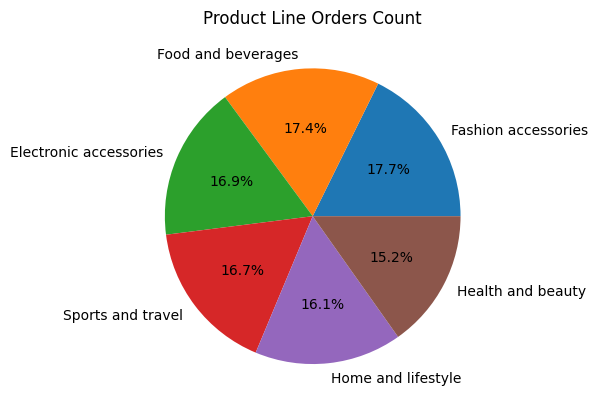

In [42]:
plt.pie(df['Product line'].value_counts(), labels=df['Product line'].value_counts().index, autopct='%1.1f%%')
plt.title('Product Line Orders Count')
plt.show()

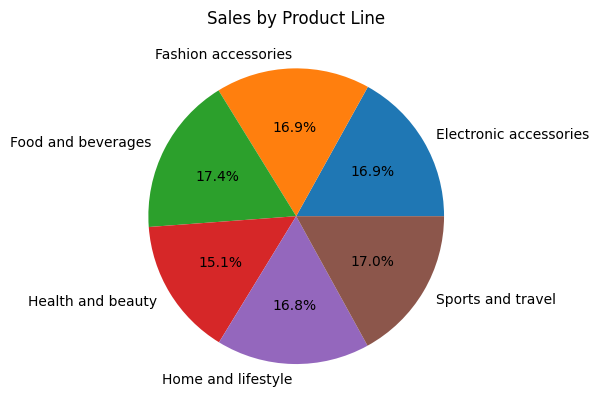

In [43]:
line_sales = df.groupby('Product line')['Total'].sum().reset_index()
plt.pie(line_sales['Total'], labels=line_sales['Product line'].value_counts().index, autopct='%1.1f%%')
plt.title('Sales by Product Line')
plt.show()

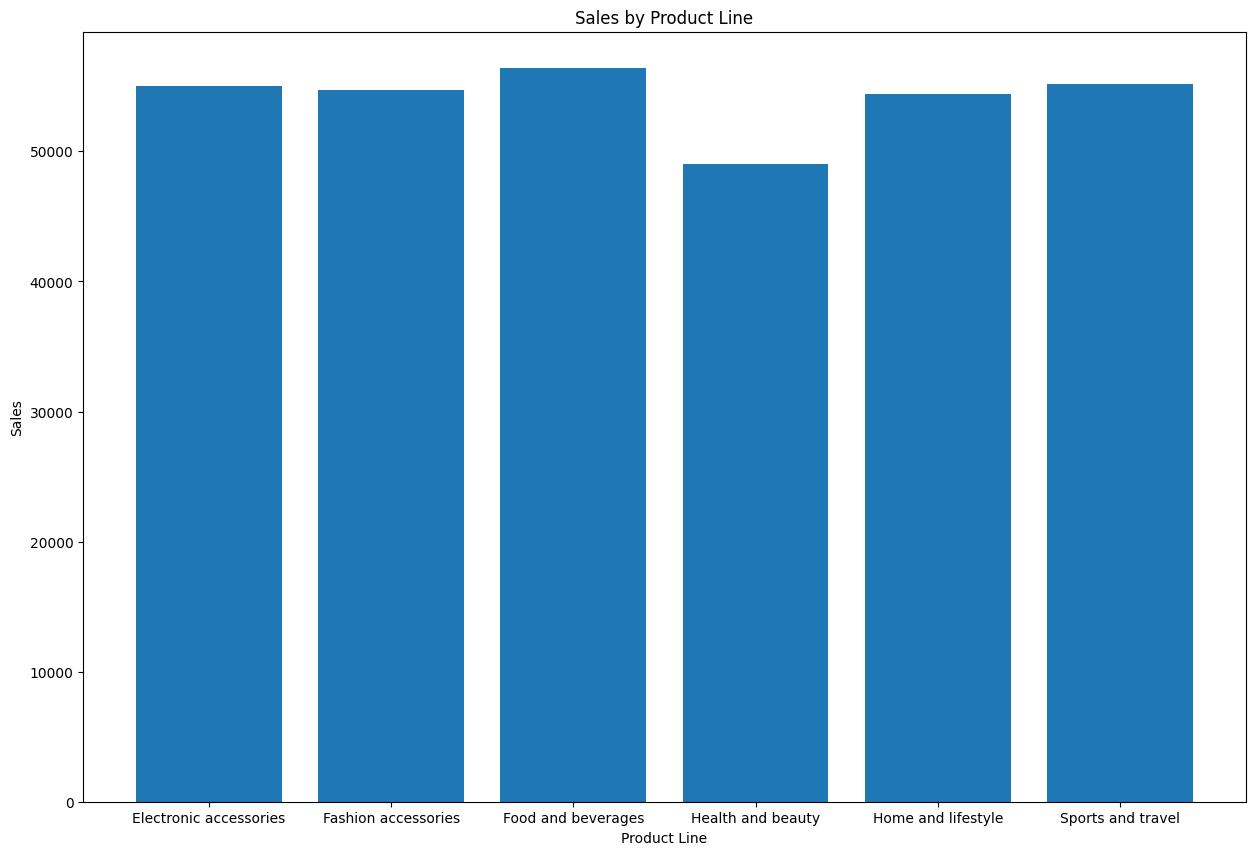

In [44]:
line_sales = df.groupby('Product line')['Total'].sum().reset_index()
plt.figure(figsize=(15, 10))
plt.bar(line_sales['Product line'], line_sales['Total'])
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.show()

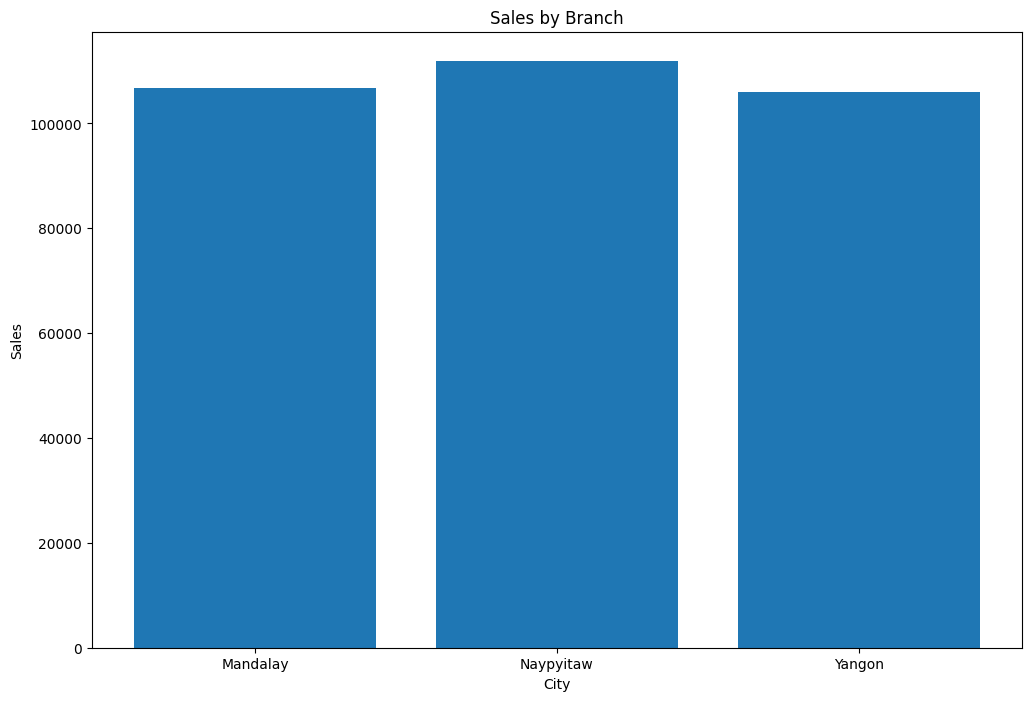

In [45]:
branch_sales = df.groupby('Branch')['Total'].sum().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(branch_sales['Branch'], branch_sales['Total'])
plt.title('Sales by Branch')
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

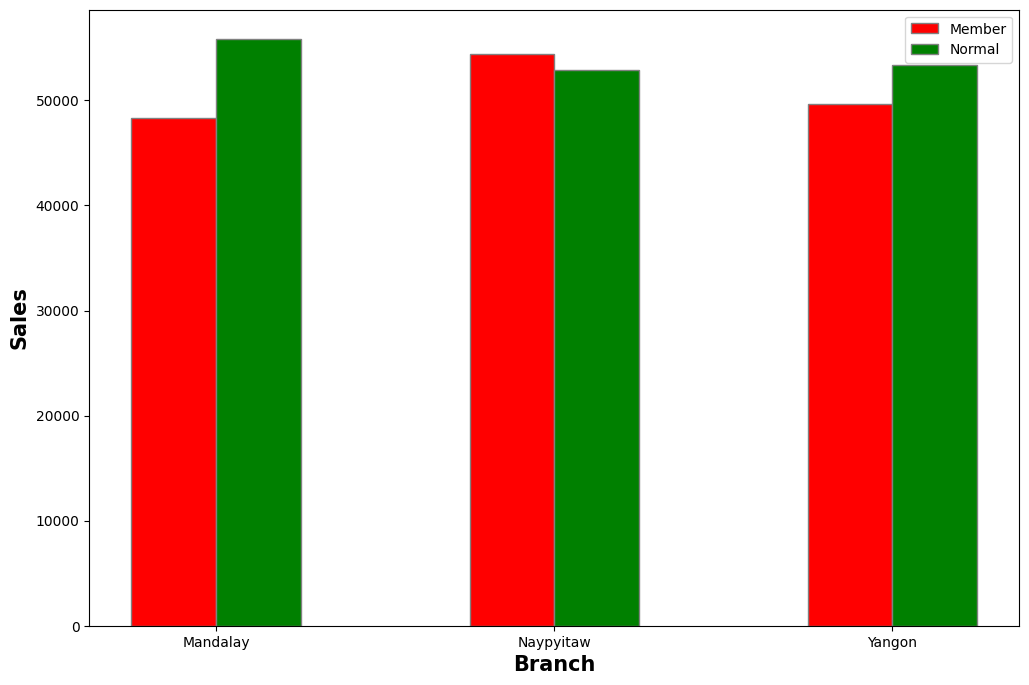

In [46]:
branch_sales_type = df.groupby(['Branch','Customer type'])['Total'].sum().reset_index()
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(branch_sales_type['Branch'].unique()))
br2 = [x + barWidth for x in br1]

member_sales = branch_sales_type[branch_sales_type['Customer type'] == 'Member']
normal_sales = branch_sales_type[branch_sales_type['Customer type'] == 'Normal']

ax.bar(br1, member_sales['Total'], color ='r', width = barWidth,
        edgecolor ='grey', label ='Member')
ax.bar(br2, normal_sales['Total'], color ='g', width = barWidth,
        edgecolor ='grey', label ='Normal')

ax.set_xlabel('Branch', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Sales', fontweight ='bold', fontsize = 15)

ax.set_xticks([r + barWidth/2 for r in range(len(branch_sales_type['Branch'].unique()))])
ax.set_xticklabels(branch_sales_type['Branch'].unique())

ax.legend()
plt.show()

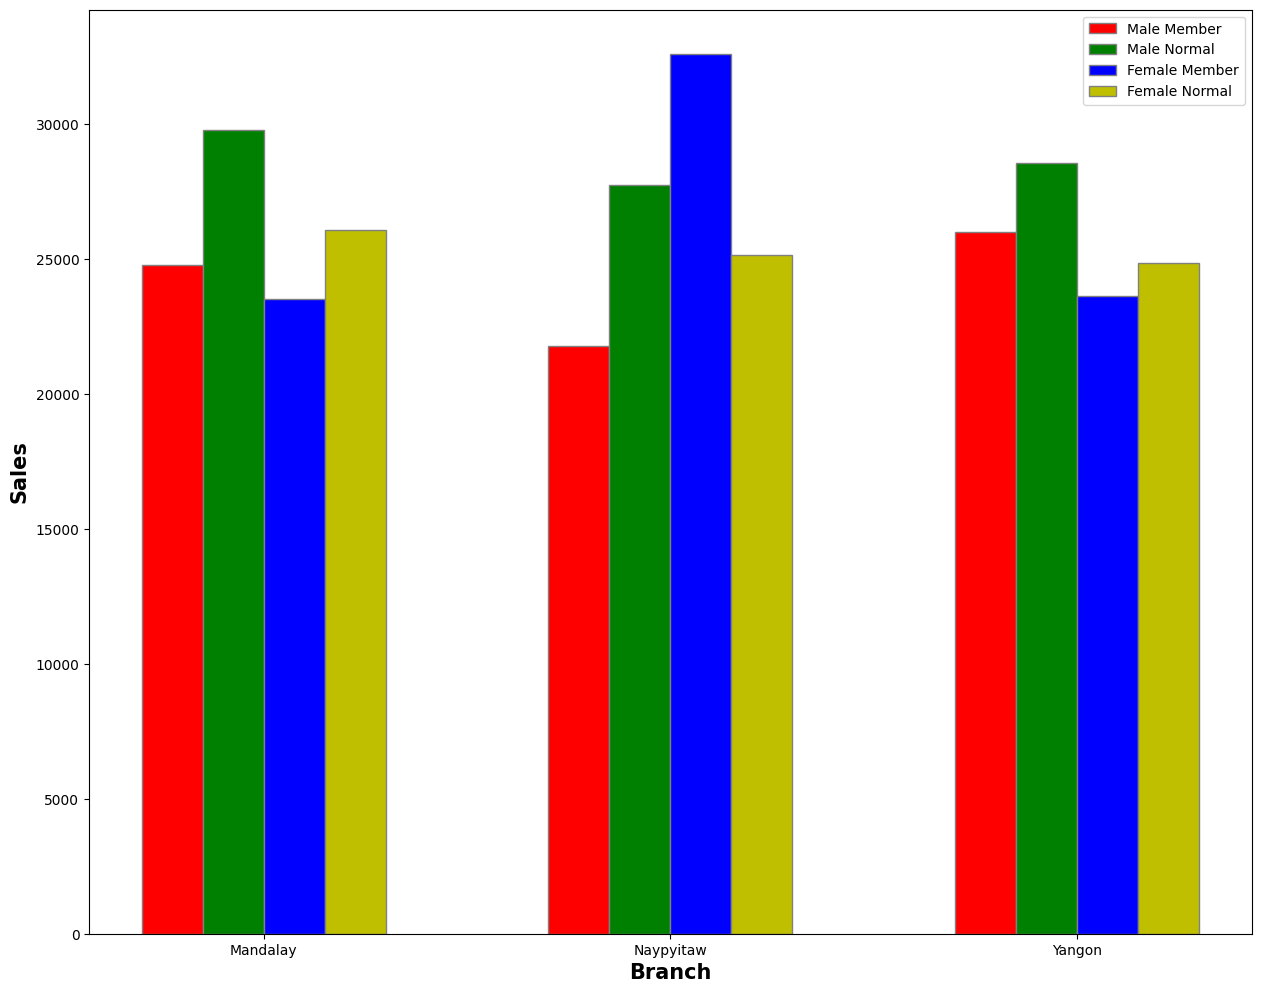

In [47]:
branch_sales_type = df.groupby(['Branch','Customer type','Gender'])['Total'].sum().reset_index()
barWidth = 0.15
fig, ax = plt.subplots(figsize =(15, 12))
br1 = np.arange(len(branch_sales_type['Branch'].unique()))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

m_member_sales = branch_sales_type[(branch_sales_type['Customer type'] == 'Member') & (branch_sales_type['Gender'] == 'Male')]
f_member_sales = branch_sales_type[(branch_sales_type['Customer type'] == 'Member') & (branch_sales_type['Gender'] == 'Female')]
m_normal_sales = branch_sales_type[(branch_sales_type['Customer type'] == 'Normal') & (branch_sales_type['Gender'] == 'Male')]
f_normal_sales = branch_sales_type[(branch_sales_type['Customer type'] == 'Normal') & (branch_sales_type['Gender'] == 'Female')]

ax.bar(br1, m_member_sales['Total'], color ='r', width = barWidth,
        edgecolor ='grey', label ='Male Member')
ax.bar(br2, m_normal_sales['Total'], color ='g', width = barWidth,
        edgecolor ='grey', label ='Male Normal')
ax.bar(br3, f_member_sales['Total'], color ='b', width = barWidth,
        edgecolor ='grey', label ='Female Member')
ax.bar(br4, f_normal_sales['Total'], color ='y', width = barWidth,
        edgecolor ='grey', label ='Female Normal')

ax.set_xlabel('Branch', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Sales', fontweight ='bold', fontsize = 15)

ax.set_xticks([r + 1.5*barWidth for r in range(len(branch_sales_type['Branch'].unique()))])
ax.set_xticklabels(branch_sales_type['Branch'].unique())

ax.legend()
plt.show()

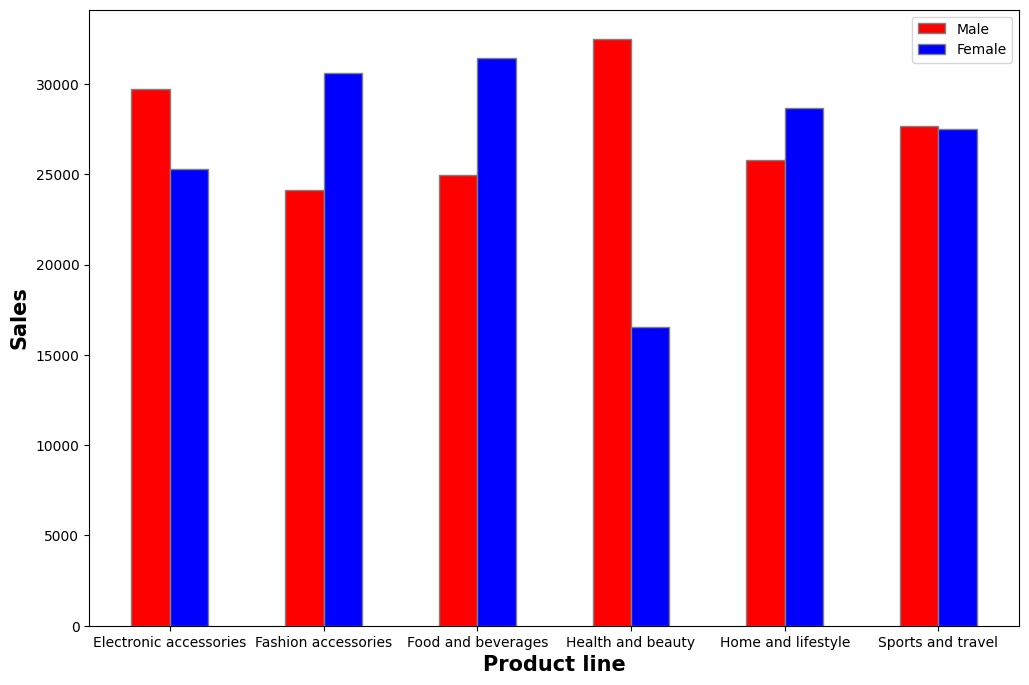

In [48]:
gender_line = df.groupby(['Gender','Product line'])['Total'].sum().reset_index()
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(gender_line['Product line'].unique()))
br2 = [x + barWidth for x in br1]

male_line = gender_line[gender_line['Gender'] == 'Male']
female_line = gender_line[gender_line['Gender'] == 'Female']

ax.bar(br1, male_line['Total'], color ='r', width = barWidth,
        edgecolor ='grey', label ='Male')
ax.bar(br2, female_line['Total'], color ='b', width = barWidth,
        edgecolor ='grey', label ='Female')

ax.set_xlabel('Product line', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Sales', fontweight ='bold', fontsize = 15)

ax.set_xticks([r + barWidth/2 for r in range(len(gender_line['Product line'].unique()))])
ax.set_xticklabels(gender_line['Product line'].unique())

ax.legend()
plt.show()

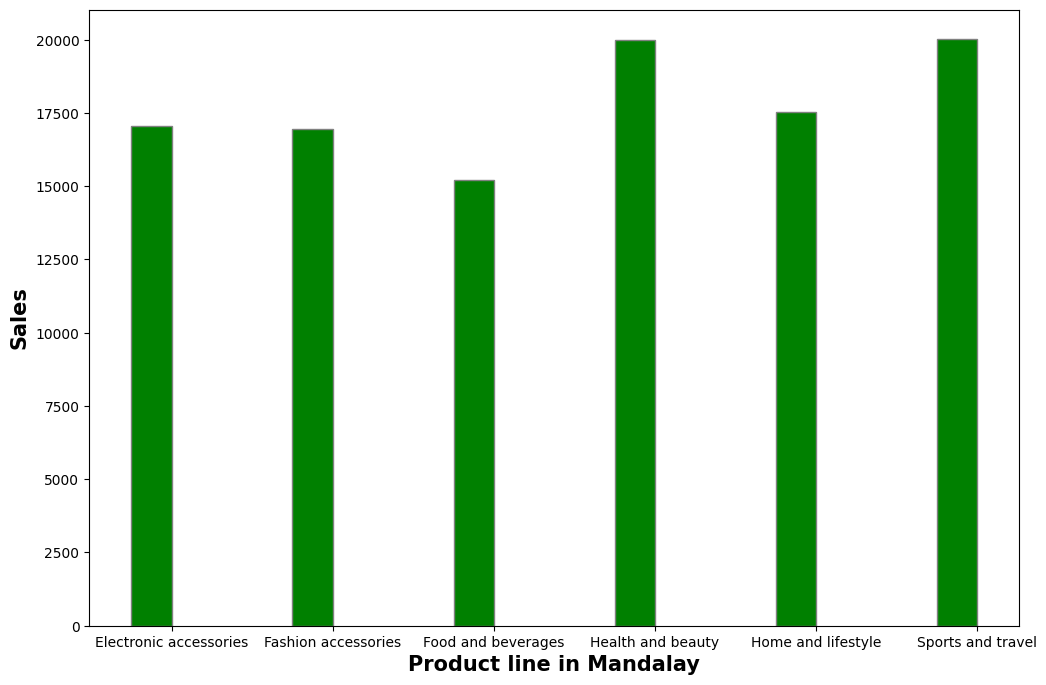

In [49]:
mandalay_sales_line = df[df['Branch'] == 'Mandalay']
mand_line_sales = mandalay_sales_line.groupby(['Product line'])['Total'].sum().reset_index()
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(mand_line_sales['Product line'].unique()))

ax.bar(br1, mand_line_sales['Total'], color ='g', width = barWidth,
        edgecolor ='grey')

ax.set_xlabel('Product line in Mandalay', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Sales', fontweight ='bold', fontsize = 15)

ax.set_xticks([r + barWidth/2 for r in range(len(mand_line_sales['Product line'].unique()))])
ax.set_xticklabels(mand_line_sales['Product line'].unique())

plt.show()

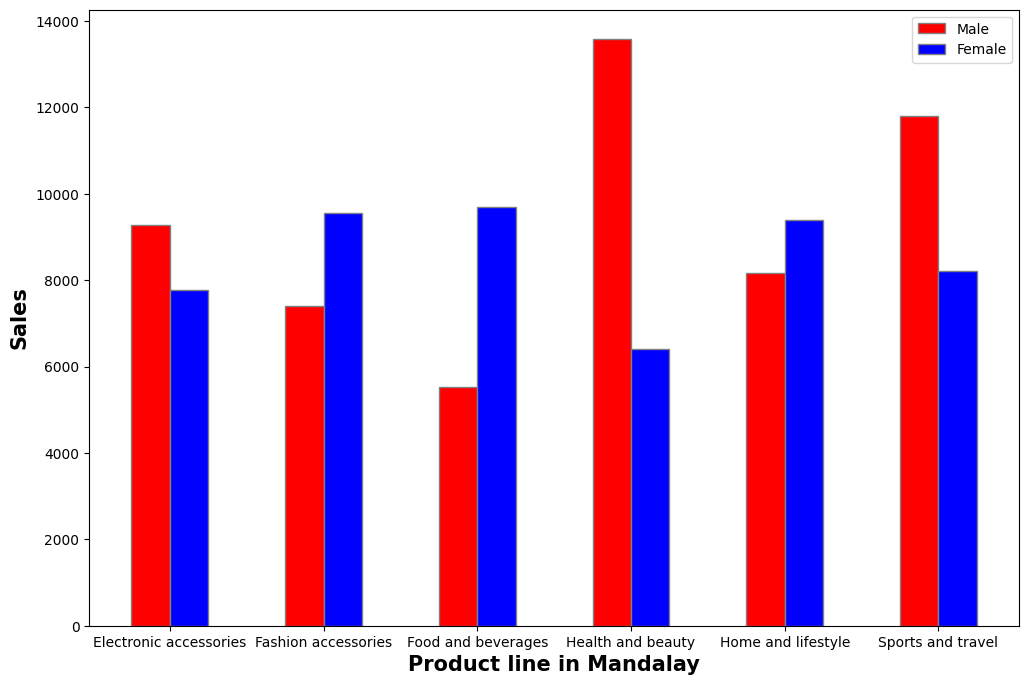

In [50]:
mandalay_sales = df[df['Branch'] == 'Mandalay']
mand_line = mandalay_sales.groupby(['Product line','Gender'])['Total'].sum().reset_index()
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(mand_line['Product line'].unique()))
br2 = [x + barWidth for x in br1]

male_line = mand_line[mand_line['Gender'] == 'Male']
female_line = mand_line[mand_line['Gender'] == 'Female']

ax.bar(br1, male_line['Total'], color ='r', width = barWidth,
        edgecolor ='grey', label ='Male')
ax.bar(br2, female_line['Total'], color ='b', width = barWidth,
        edgecolor ='grey', label ='Female')

ax.set_xlabel('Product line in Mandalay', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Sales', fontweight ='bold', fontsize = 15)

ax.set_xticks([r + barWidth/2 for r in range(len(gender_line['Product line'].unique()))])
ax.set_xticklabels(gender_line['Product line'].unique())

ax.legend()
plt.show()

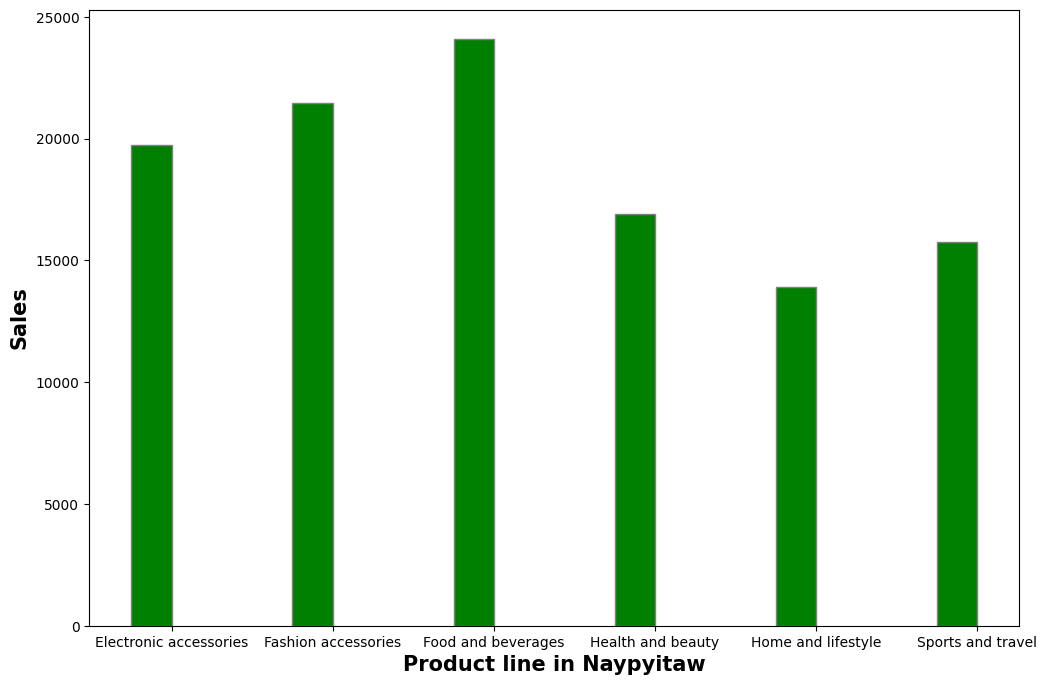

In [51]:
naypyitaw_sales_line = df[df['Branch'] == 'Naypyitaw']
naypy_line_sales = naypyitaw_sales_line.groupby(['Product line'])['Total'].sum().reset_index()
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(naypy_line_sales['Product line'].unique()))

ax.bar(br1, naypy_line_sales['Total'], color ='g', width = barWidth,
        edgecolor ='grey')

ax.set_xlabel('Product line in Naypyitaw', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Sales', fontweight ='bold', fontsize = 15)

ax.set_xticks([r + barWidth/2 for r in range(len(gender_line['Product line'].unique()))])
ax.set_xticklabels(naypy_line_sales['Product line'].unique())

plt.show()

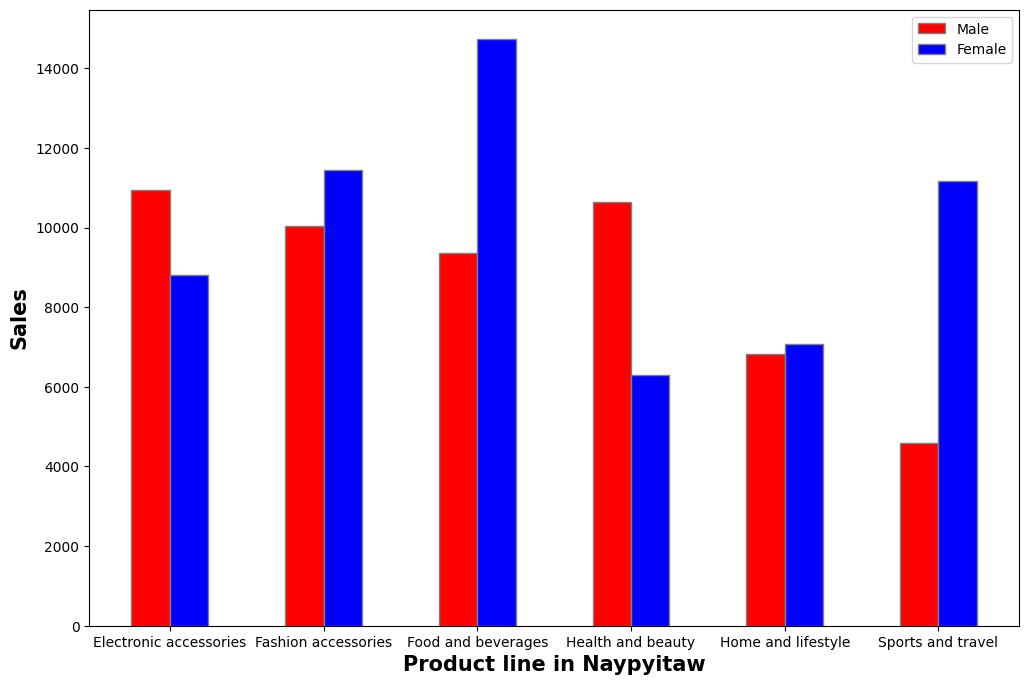

In [52]:
naypyitaw_sales = df[df['Branch'] == 'Naypyitaw']
naypy_line = naypyitaw_sales.groupby(['Product line','Gender'])['Total'].sum().reset_index()
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(naypy_line['Product line'].unique()))
br2 = [x + barWidth for x in br1]

male_line = naypy_line[naypy_line['Gender'] == 'Male']
female_line = naypy_line[naypy_line['Gender'] == 'Female']

ax.bar(br1, male_line['Total'], color ='r', width = barWidth,
        edgecolor ='grey', label ='Male')
ax.bar(br2, female_line['Total'], color ='b', width = barWidth,
        edgecolor ='grey', label ='Female')

ax.set_xlabel('Product line in Naypyitaw', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Sales', fontweight ='bold', fontsize = 15)

ax.set_xticks([r + barWidth/2 for r in range(len(gender_line['Product line'].unique()))])
ax.set_xticklabels(gender_line['Product line'].unique())

ax.legend()
plt.show()

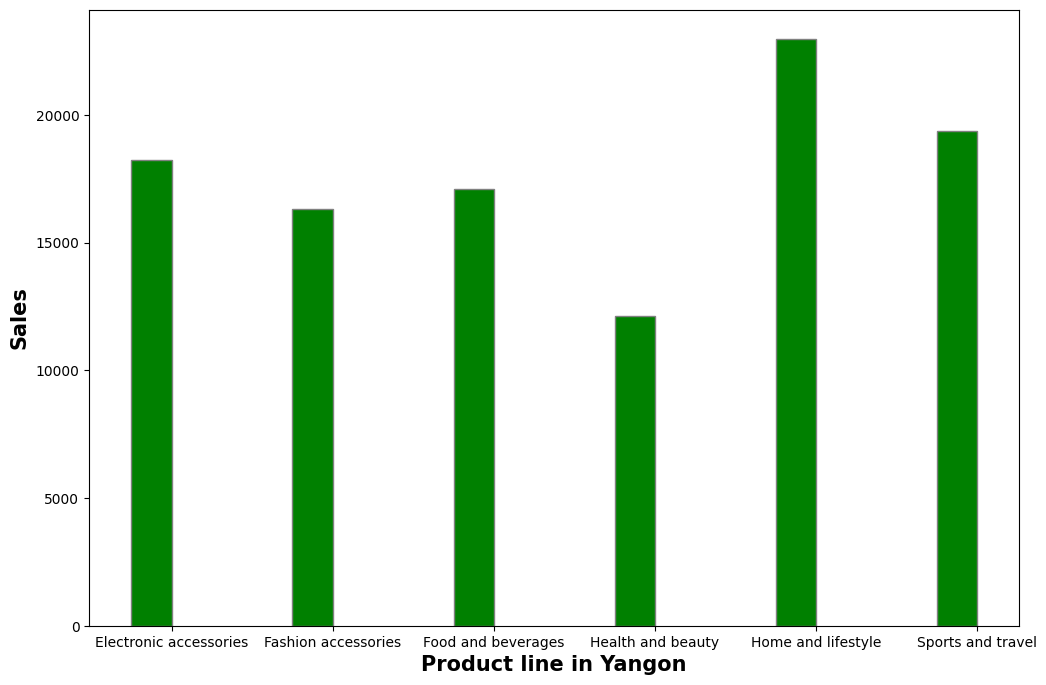

In [53]:
yangon_sales_line = df[df['Branch'] == 'Yangon']
yan_line_sales = yangon_sales_line.groupby(['Product line'])['Total'].sum().reset_index()
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(yan_line_sales['Product line'].unique()))

ax.bar(br1, yan_line_sales['Total'], color ='g', width = barWidth,
        edgecolor ='grey')

ax.set_xlabel('Product line in Yangon', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Sales', fontweight ='bold', fontsize = 15)

ax.set_xticks([r + barWidth/2 for r in range(len(gender_line['Product line'].unique()))])
ax.set_xticklabels(yan_line_sales['Product line'].unique())

plt.show()

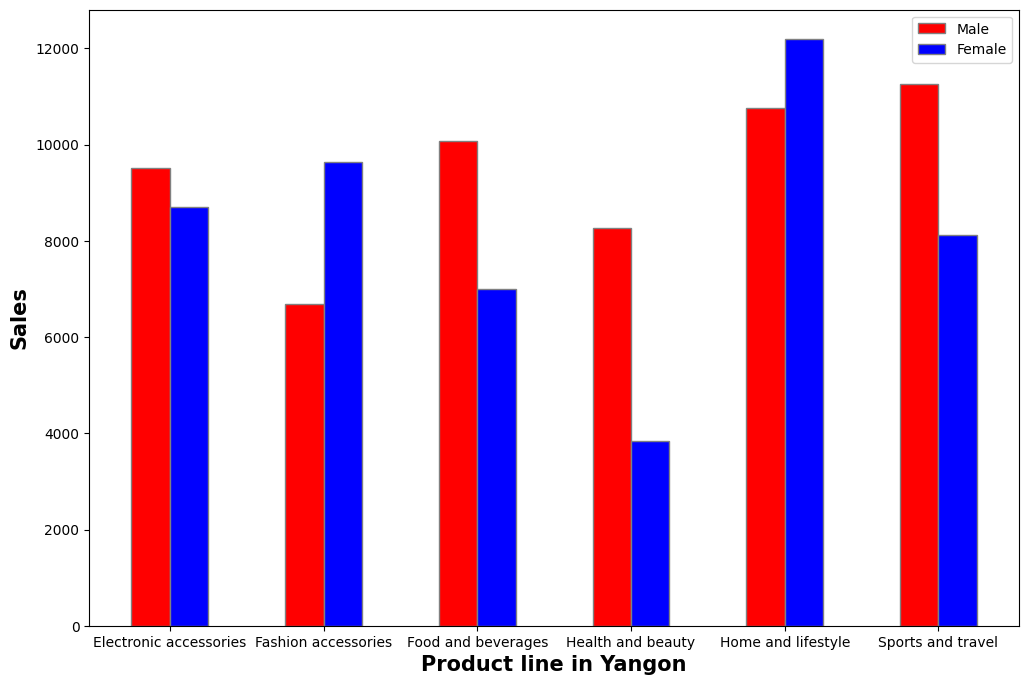

In [54]:
yangon_sales = df[df['Branch'] == 'Yangon']
yan_line = yangon_sales.groupby(['Product line','Gender'])['Total'].sum().reset_index()
barWidth = 0.25
fig, ax = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(yan_line['Product line'].unique()))
br2 = [x + barWidth for x in br1]

male_line = yan_line[mand_line['Gender'] == 'Male']
female_line = yan_line[mand_line['Gender'] == 'Female']

ax.bar(br1, male_line['Total'], color ='r', width = barWidth,
        edgecolor ='grey', label ='Male')
ax.bar(br2, female_line['Total'], color ='b', width = barWidth,
        edgecolor ='grey', label ='Female')

ax.set_xlabel('Product line in Yangon', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Sales', fontweight ='bold', fontsize = 15)

ax.set_xticks([r + barWidth/2 for r in range(len(gender_line['Product line'].unique()))])
ax.set_xticklabels(gender_line['Product line'].unique())

ax.legend()
plt.show()

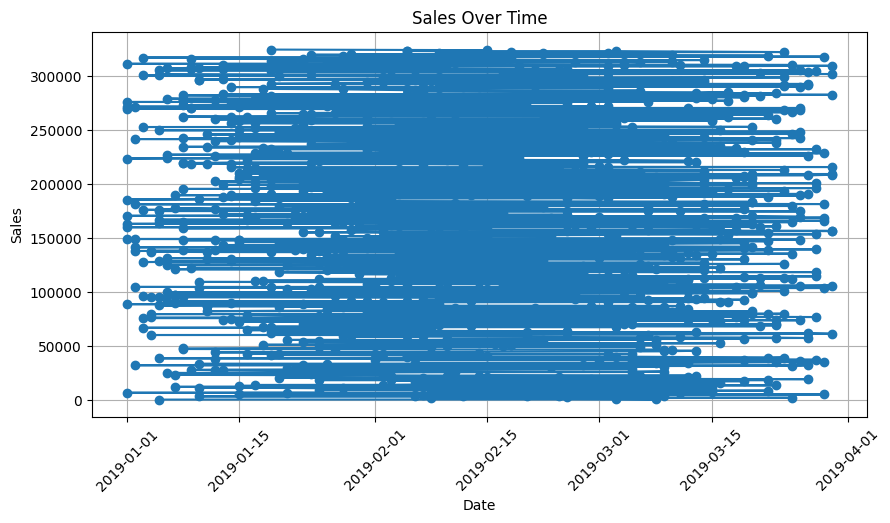

In [55]:
plt.figure(figsize=(10, 5))
sales_over_time = df['Total'].cumsum()
plt.plot(df['Date'], sales_over_time, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()

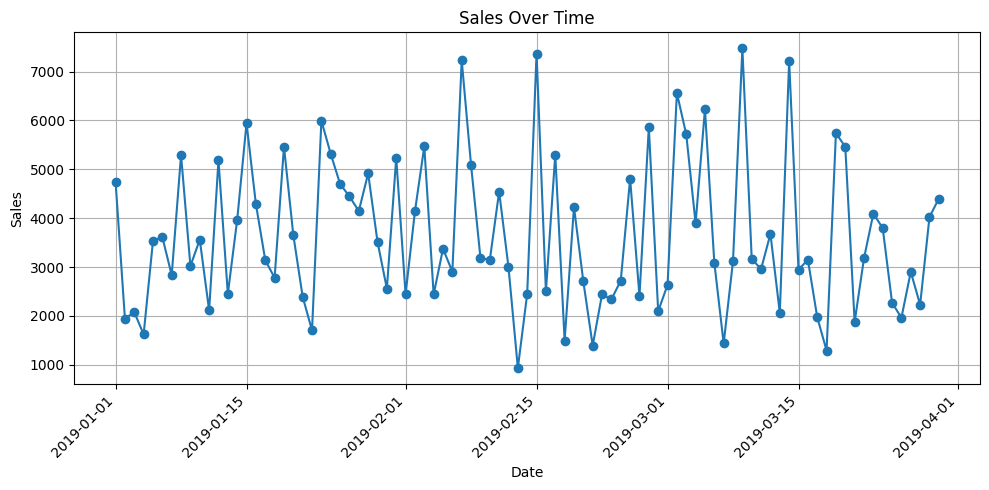

In [56]:
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(daily_sales['Date'], daily_sales['Total'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

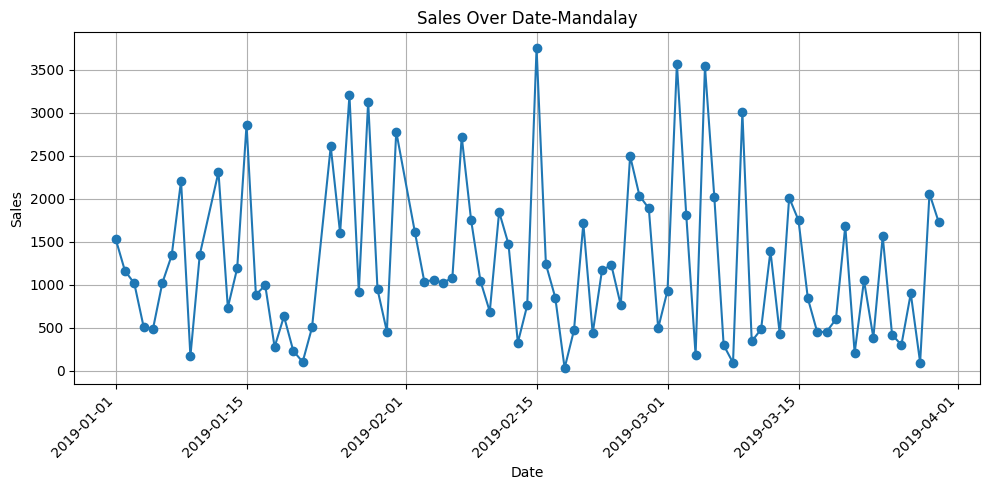

In [57]:
df['Date'] = pd.to_datetime(df['Date'])
mandalay_sales = df[df['Branch'] == 'Mandalay']
daily_sales_mandalay = mandalay_sales.groupby('Date')['Total'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(daily_sales_mandalay['Date'], daily_sales_mandalay['Total'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Date-Mandalay')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

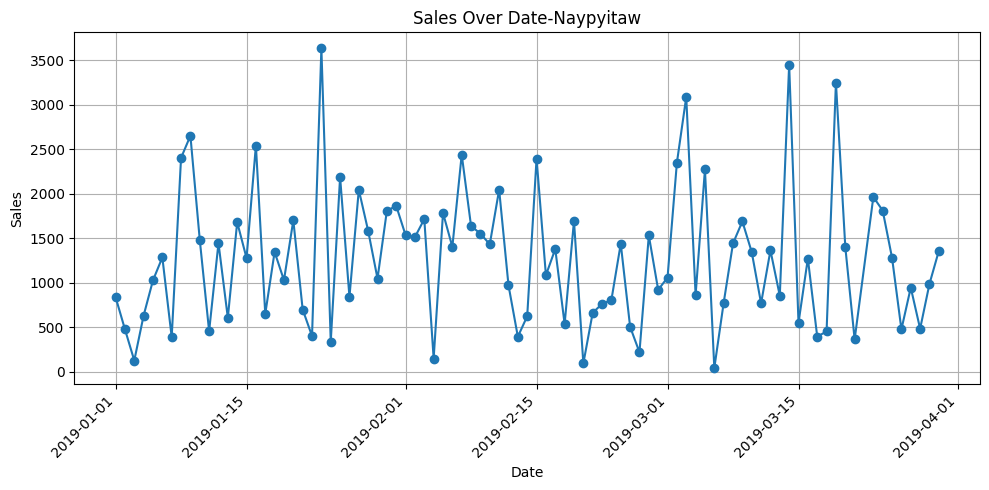

In [58]:
df['Date'] = pd.to_datetime(df['Date'])
naypyitaw_sales = df[df['Branch'] == 'Naypyitaw']
daily_sales_naypyitaw = naypyitaw_sales.groupby('Date')['Total'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(daily_sales_naypyitaw['Date'], daily_sales_naypyitaw['Total'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Date-Naypyitaw')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

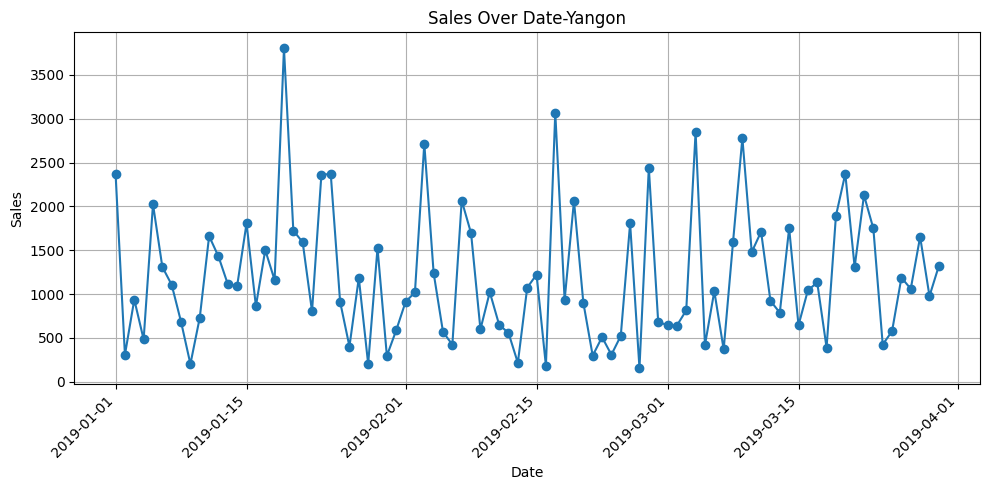

In [59]:
df['Date'] = pd.to_datetime(df['Date'])
yangon_sales = df[df['Branch'] == 'Yangon']
daily_sales_yangon = yangon_sales.groupby('Date')['Total'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(daily_sales_yangon['Date'], daily_sales_yangon['Total'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Date-Yangon')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

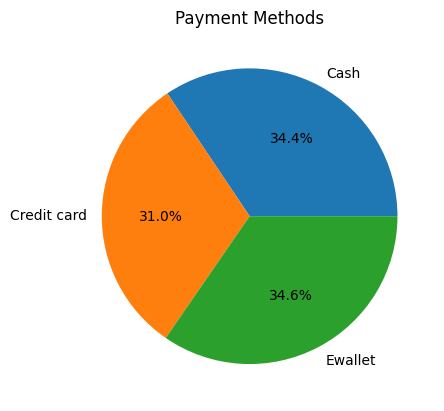

In [60]:
payment_method = df.groupby('Payment')['Invoice ID'].count()
plt.pie(payment_method.values, labels=payment_method.index, autopct='%1.1f%%')
plt.title('Payment Methods')
plt.show()

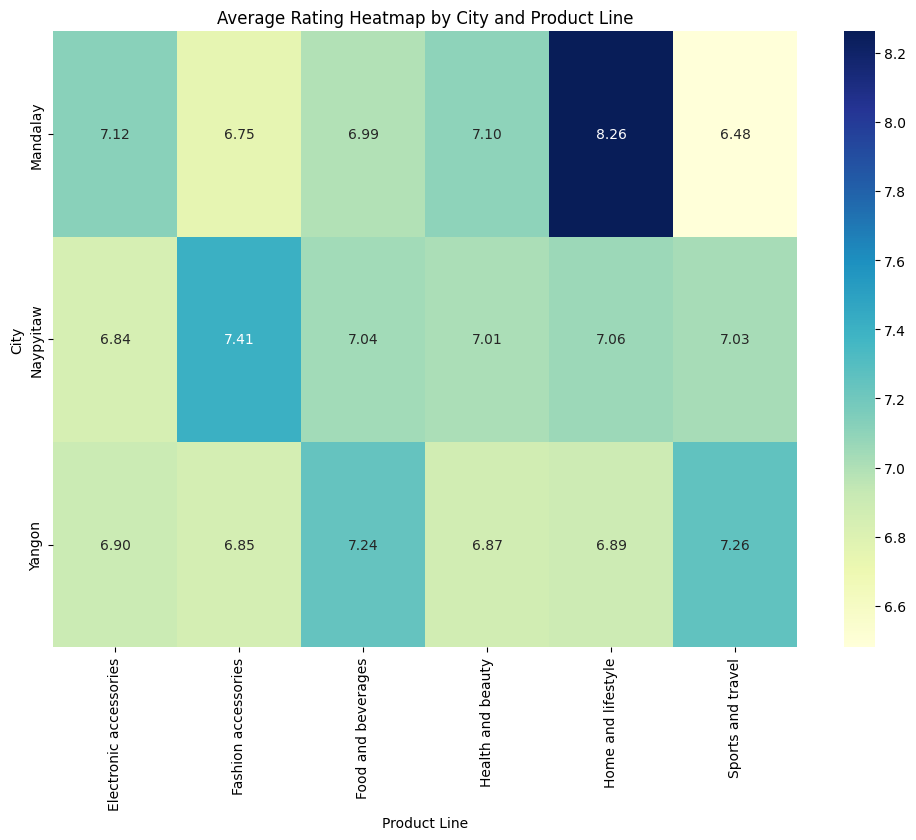

In [61]:
plt.figure(figsize=(12, 8))
city_product_rating = df.pivot_table(index='Branch', columns='Product line', values='Rating', aggfunc='mean')
sns.heatmap(city_product_rating, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Rating Heatmap by City and Product Line')
plt.xlabel('Product Line')
plt.ylabel('City')
plt.show()
